# КИХ и БИХ цифровые фильтры

Цифровой фильтр - устройство (или метод) предназначенное для обработки цифровых сигналов.


*Импульсная характеристика* фильтра - реакция фильтра на единичный скачок (т.е. сигнал x(0)=1, x(t)=0, t>0 ).

Различают фильтры с *конечной* (КИХ) и *бесконечной* (БИХ) имульсной характеристикой.

## Фильтр с конечной импульсной характеристикой, КИХ

Линейный фильтр с конечной импульсной характеристикой (**КИХ**) описывается разностным уравнением:

x(n) - входная последовательность,

y(n) - выходная последовательность,

n - текущий момент времени (номер временного отсчета).

$$\large
y(n)=\sum _ {m=0}^ L b(m) x(n-m)
$$

где b(m) - коэффициенты фильтра.

![img](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9b/FIR_Filter.svg/600px-FIR_Filter.svg.png)

Здесь блоки $z^{-1}$ означают задержку, т.е. запоминание, сигнала на один такт времени, что в z-области соответствует умножению на $z^{-1}$.

На рисунке выход первого (левого) блока $z^{-1}$ выдает $x[n-1]$, второго - $x[n-2]$ и т.д.

Уравнение фильтра описывается сверткой сигналов, в z-области свертке соответствует умножение z-образов сигналов.

Во времянной области:
$$\large
y(n)=\sum _ {m=0} ^L b(m) x(n-m)
$$

В z-области:
$$\large
Y(z)= X(z) \cdot \sum _ {m=0} ^ L b(m) \cdot z^{-m} = X(z) * H(z)
$$

Здесь H(z) - передаточная характеристика фильтра:
$$\large
H(z):= \frac{Y(z)} {X(z)}=\sum _ {m=0} ^ L b(m) \cdot z^{-m}
$$



## Фильтр с бесконечной импульсной характеристикой, БИХ

Линейный фильтр с бесконечной импульсной харакеристикой (**БИХ**) описывается разностным уравнением:

$$\large
\begin{equation}
y(n)= \sum _{m=0} ^L b(m) \cdot x(n-m) - \sum _ {r=1} ^R a(r) \cdot y(n-r)
\end{equation}$$    



Форма 1:
![img](https://upload.wikimedia.org/wikipedia/commons/e/e7/IIR_Filter_Direct_Form_1.svg)


Форма 2:

![img](https://upload.wikimedia.org/wikipedia/commons/0/01/IIR-filter-canon.PNG)



В z-области БИХ фильтр описывается уравнением

$$ \large
Y(z)= \sum _{m=0} ^ L b(m) \cdot X(z) \cdot z^{-m} + \sum _{r=1}^R a(r) \cdot Y(z) \cdot z^{-r}$$

(в некоторых книгах знак у множителей $a(r)$ может быть противоположным)

Перенося Y(z) в левую часть:

$$\large
Y(z)(1+\sum _ {r=1} ^R a(r) \cdot z^{-r})= X(z) \cdot \sum _{m=0} ^ L b(m) \cdot  z^{-m} = X(z)*H(z)
$$

Передаточная функция БИХ фильтра:
$$ \large
H(z)=\frac{Y(z)}  {X(z)}= \frac{\sum _ {m=0} ^L b(m)  \cdot z^{-m}}{1+\sum _ {r=1} ^ R a(r) \cdot z^{-r}}
$$


## КИХ и БИХ фильтры в Python `lfilter`

Работа с различными фильтрами реализована в модуле signal библиотеки [scipy](https://docs.scipy.org/doc/scipy/index.html).

Линейные КИХ и БИХ фильтры реализованы в функции [`lfilter`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html).

```
scipy.signal.lfilter(b, a, x, axis=- 1, zi=None)
```
Аргументы:
* `b` - коэффициенты для КИХ части фильтра.
* `a` - коэффициенты для БИХ части фильтра. Коэффициент a[0] должен быть равным 1, иначе все другие коэффициенты будут нормализованы на него.
* `zi` - задает начальные значения линии задержек, т.е. инициализирует фильтр, это вектор длины `max(len(a), len(b)) - 1`
* `x`  - входной сигнал, одномерный массив.


Возвращается:
* `y`  - выходной сигнал.
* `zf` - значение линии задержек с последнего шага времени.



## Пример расчета импульсной характеристики фильтра.

**Импульсная характеристика** - реакция фильтра на единичный скачок на входе.

Сделаем фильтр с коэффициентами b(0)=1 и a(1)=p (a(0) всегда равен 1).

Его уравнение
$$\large
y(n)=1\cdot x(n) - p \cdot y(n-1)$$

Если x(n) - единичный скачок, p<0 то должны получить экспоненциально затухающую или возрастающую последовательность: $$\large
1,p,p^{2},p^{3},...
$$

Проверим.

<ipython-input-1-929804805d75>:17: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(y, use_line_collection=True)


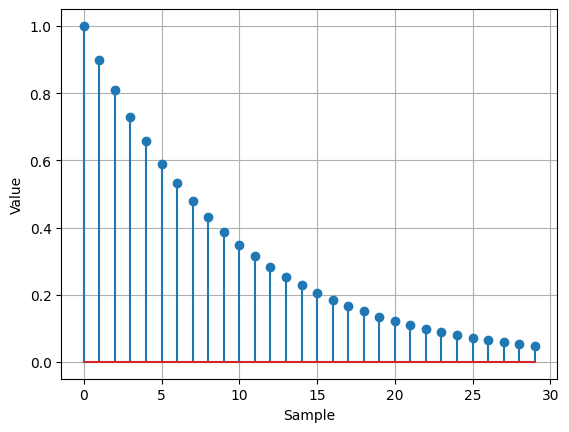

In [1]:
import scipy.signal # модуль для работы с сигналами
import matplotlib.pyplot as plt # для рисования
import numpy as np # для создания массивов

# Единичный импульс - все элементы равны 0
x=np.zeros(30)
x[0] = 1 # кроме самого первого
# Коэффициенты
A=[1,-0.9];  # БИХ для p= - 0.9
#A=[1];  # БИХ для p= - 0.9
B=[1]; # КИХ
#B=[1, -0.5 , 3];
# Расчет выхода:
y=scipy.signal.lfilter(B,A,x); #
#  Рисуем
plt.figure()
plt.stem(y, use_line_collection=True)
plt.xlabel('Sample')
plt.ylabel('Value')
plt.grid()


## Пример фильтрования шума
Сделаем шумный сигнал

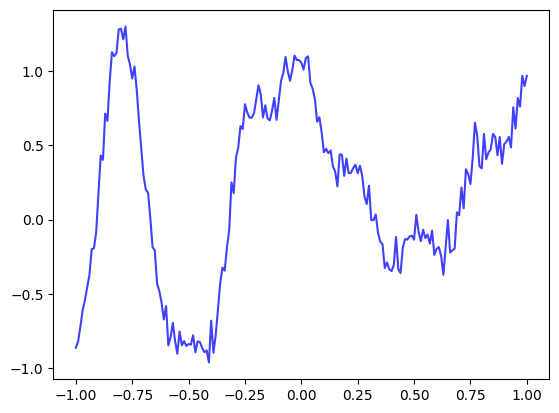

In [2]:
from scipy import signal
import matplotlib.pyplot as plt
rng = np.random.default_rng()
t = np.linspace(-1, 1, 201)
x = (np.sin(2*np.pi*0.75*t*(1-t) + 2.1) +
     0.1*np.sin(2*np.pi*1.25*t + 1) +
     0.18*np.cos(2*np.pi*3.85*t))

xn = x + rng.standard_normal(len(t)) * 0.08
plt.plot(t, xn, 'b', alpha=0.75)

Зададим коэффициенты фильтра, которые позволяют снизить шум сигнала.

Как вообще снизить шум? Частоты шума отличаются от частот сигнала, значит надо подавить те частоты, на которых присутствует шум, сохранив те, на которых присутствует сигнал.

Это сложная задача, множество подходов к ее решению. Один из вариантов - [фильтр Баттерворта](https://ru.wikipedia.org/wiki/Фильтр_Баттерворта), в котором коэффициенты расчитываются так, чтобы почти полностью пропустить частоты из нужного диапазона, подавив другие. Сейчас мы не будем вникать в теорию такого фильтра, но получим коэффициенты для него командой `butter()`, указав порядок фильтра (число задержек) и критическую частоту.
Критическая частота указыватся в шкале 0...1, где 1 = частота Найквиста (1/2 частоты дискретизации).


In [3]:
N=5 # порядок фильтра = число задержек
freq=0.1 # критическая частота, доля.
b, a = signal.butter(N, freq)#   3, 0.03
print('b ',b)
print('\na ',a)

b  [5.97957804e-05 2.98978902e-04 5.97957804e-04 5.97957804e-04
 2.98978902e-04 5.97957804e-05]

a  [ 1.         -3.98454312  6.43486709 -5.25361517  2.16513291 -0.35992825]


Сглаживающие фильтры можно применять несколько раз подряд, получая все более и более сглаженный сигнал.

Выход фильтра, вообще говоря, зависит не только от коэффициентов, но и от начальных значений задержек. Чтобы выходной сигнал после фильтра начинался с того же значения, что и входной сигнал, можно воспользоваться командой `lfilter_zi` для расчета таких начальных значений. Сама команда считает такие начальные значения для единичнго сигнала, а для произвольного, нужно умножить начальные значения на значение отсчета сигнала.

In [4]:
zi = signal.lfilter_zi(b, a) # начальные значения для фильтра, которые приведут к тому же отсчету выхода, что и на входе (для единичного сигнала)

In [ ]:
zi

array([ 0.9999402 , -2.98490189,  3.44936724, -1.80484589,  0.35998804])

Фильтруем сигнал

In [5]:
z, _ = signal.lfilter(b, a, xn, zi=zi*xn[0]) #
print(z[0],xn[0])

-0.8610893917739043 -0.861089391774127


Фильтруем еще раз

In [6]:
z2, _ = signal.lfilter(b, a, z, zi=zi*z[0])

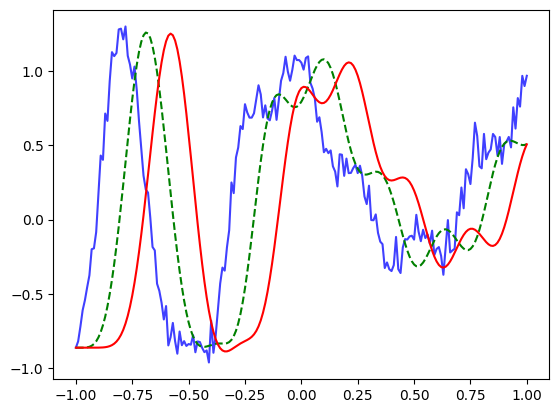

In [7]:
plt.plot(t, xn, 'b-', alpha=0.75)
plt.plot(t, z, 'g--', t, z2, 'r-')

<ipython-input-8-d067e91e62e8>:14: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(y, use_line_collection=True)


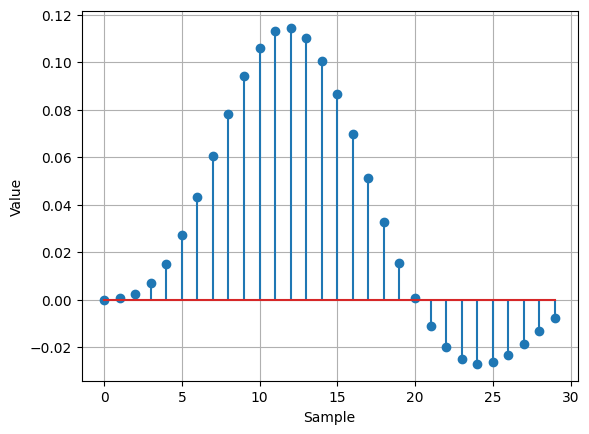

In [8]:
import scipy.signal # модуль для работы с сигналами
import matplotlib.pyplot as plt # для рисования
import numpy as np # для создания массивов

# Единичный импульс - все элементы равны 0
x=np.zeros(30)
x[0] = 1 # кроме самого первого
# Коэффициенты

# Расчет выхода:
y=scipy.signal.lfilter(b,a,x); #
#  Рисуем
plt.figure()
plt.stem(y, use_line_collection=True)
plt.xlabel('Sample')
plt.ylabel('Value')
plt.grid()

Фильтры, поскольку они работают с *прошлыми* отсчетами сигнала, вносят задержку в выходной сигнал. Поэтому отфильтрованная версия сигнала отстает от оригинального сигнала, и чем больше задержек, тем больше такое отставание. Более того, разные частоты могут отставать по разному, *фаза нелинейна*.

Если задача позволяет, можно сначала применить фильтр для сигнала с обычным порядком отсчетов, а потом применить фильтр для сигнала с обратным порядком отсчетов (т.е. с конца сигнала). Тогда результаты отставания будут скомпенсированы. Такой процесс выполняется в команде `filtfilt`. Следует помнить, что такое возможно только для уже записанных в память сигналов.

In [9]:
y = signal.filtfilt(b, a, xn)


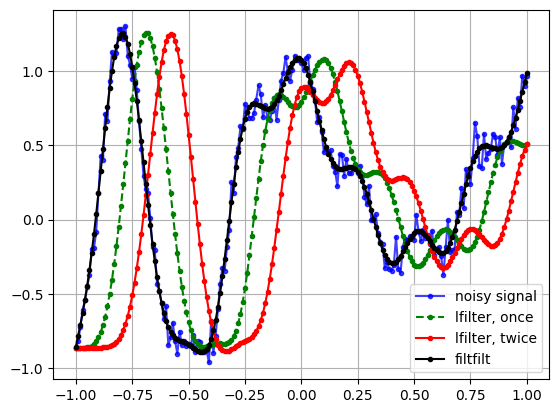

In [10]:
plt.figure
plt.plot(t, xn, '.b-', alpha=0.75)
plt.plot(t, z, '.g--', t, z2, '.r-', t, y, '.k-')
plt.legend(('noisy signal', 'lfilter, once', 'lfilter, twice',
            'filtfilt'), loc='best')
plt.grid(True)
plt.show()

Посчитать отставание разных частот, так называемую *групповую задержку*, можно командой `group_delay()`.

In [11]:
w, gd = signal.group_delay((b, a))

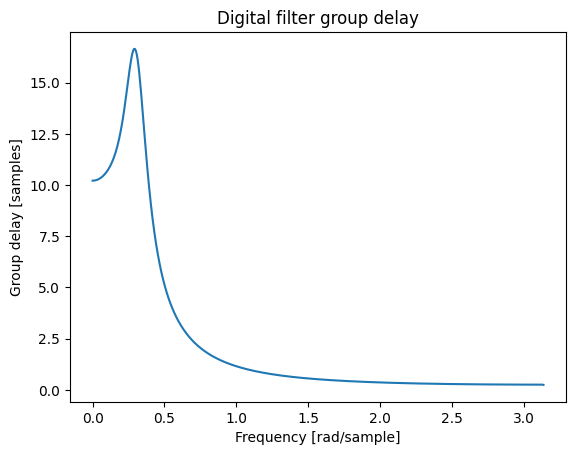

In [12]:
import matplotlib.pyplot as plt
plt.title('Digital filter group delay')
plt.plot(w, gd)
plt.ylabel('Group delay [samples]')
plt.xlabel('Frequency [rad/sample]')
plt.show()

<ipython-input-13-ffd8082d19ff>:18: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  ax1.stem(y, use_line_collection=True)


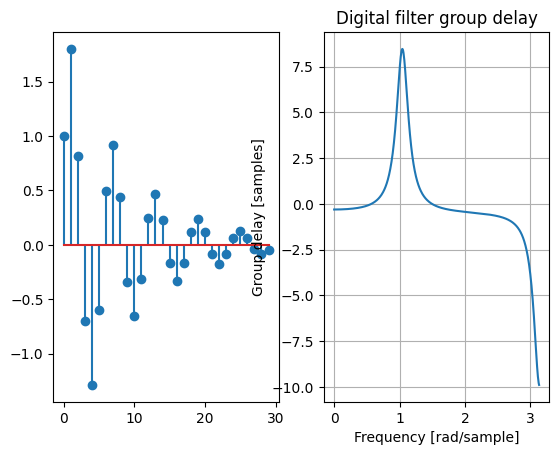

In [13]:
import scipy.signal # модуль для работы с сигналами
import matplotlib.pyplot as plt # для рисования
import numpy as np # для создания массивов

# Единичный импульс - все элементы равны 0
x=np.zeros(30)
x[0] = 1 # кроме самого первого
# Коэффициенты
A=[1,-0.9,+0.8];  # БИХ для p= - 0.9
#A=[1]
B=[1, 0.9]; # КИХ
# Расчет выхода:
y=scipy.signal.lfilter(B,A,x); #

w, gd = signal.group_delay((B, A))
#  Рисуем
_, (ax1,ax2)=plt.subplots(1,2)
ax1.stem(y, use_line_collection=True)
plt.xlabel('Sample')
plt.ylabel('Value')
plt.grid()

ax2.plot(w, gd)
plt.title('Digital filter group delay')
plt.ylabel('Group delay [samples]')
plt.xlabel('Frequency [rad/sample]')
plt.show()

# Задания
Посчитайте и отобразите импульсную характеристику фильтра butter.

Изменяя частоты и порядок фильтра butter, добейтесь меньших задержек сигнала. Как это влияет на отсеивание частот?

# Ссылки

Использованы и адаптированы материалы:
* https://docs.scipy.org/doc/scipy/reference/signal.html
* https://github.com/codeur66/ADSP_Tutorials-1
